# BatchNormalizationを試してみる。
テキストのコピペ＋自分の少しの試し
- BatchNormalizationでの正規化を可視化
- logのグラフを復習
- BatchNormalizationを評価（テキストのコピペ）

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam
#%matplotlib notebook

In [2]:
#テキストのBatchNormalizationをインポート
from common.layers import BatchNormalization

## ランダムデータをBatchNormalizationしてみる

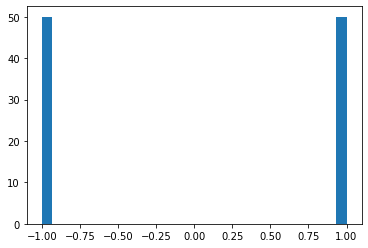

<Figure size 432x288 with 0 Axes>

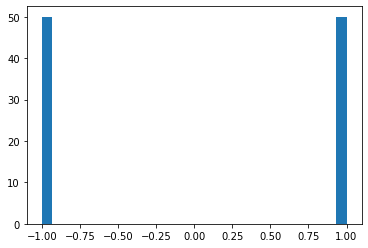

<Figure size 432x288 with 0 Axes>

In [3]:
node_num = 100
gamma = np.ones(node_num)
beta  = np.zeros(node_num)
bn = BatchNormalization(gamma, beta)

in_data = np.random.randn(2, 100)
#print(x)
out_data = bn.forward(in_data)

#print("=== in data ====")
#print(in_data)
#print("=== out data ====")
#print(out_data)
#y = out_data[0]
#print(y.shape[0])
#print(range(y.shape[0]))
#print(np.arange(y.shape[0]))
#print(np.arange(range(y.shape[0])))

for y in out_data:
    #plt.plot(x,y)
    plt.hist(y, 30, range=(-1,1))
    plt.figure()
    plt.show()


ランダムデータだと微妙にばらつきが極端(1と-1にデータが集中）していることがわかる。
次に、MNISTデータでBatchNormalizationを見てみる。

## MNISTデータをBatchNormalizationしてみる

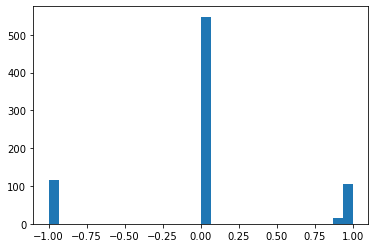

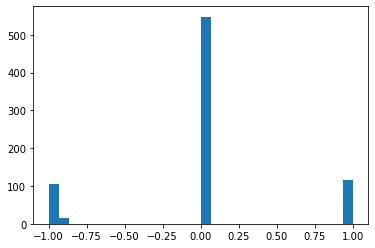

<Figure size 432x288 with 0 Axes>

In [8]:
node_num = 784

gamma = np.ones(node_num)
beta  = np.zeros(node_num)
bn = BatchNormalization(gamma, beta)

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

in_data = x_train[0:2]
#print(x)
out_data = bn.forward(in_data)

#print("=== in data ====")
#print(in_data)

#print("=== out data ====")
#print(out_data)

#y = out_data[0]

#print(y.shape[0])
#print(range(y.shape[0]))
#print(np.arange(y.shape[0]))

#print(np.arange(range(y.shape[0])))

for y in out_data:
    #plt.plot(x,y)
    plt.hist(y, 30, range=(-1,1))
    plt.figure()
    
plt.show()

## logspaceを学んでみる
テキストのサンプルプログラムではlogspaceを使ってグラフを描画しているようで、logspaceがよくわからないので実際の動きを試してみる。

> numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)[source]

> パラメータ	概要

> start	生成される配列の最初の値。

> stop	f生成される値の最期の値。endpointにFalseが設定されている場合はこの値を含まなくなります。

> num	生成する配列(ndarray)の要素数（デフォルト50で省略可能）

> endpoint	Trueの場合、stopが最後の値となる。Falseの場合、stopの値が配列に含まれない。（デフォルトTrueで省略可能）

> base	基数(底)（デフォルト10.0で省略可能）

> dtype	出力配列の型（デフォルトfloat64で省略可能）


以下が、実験で使う重みのスケールのために使っているlogspace。
1.00000000e+00〜1.00000000e-04までの16個の数字を使う。

(16,)
16
[1.00000000e+00 5.41169527e-01 2.92864456e-01 1.58489319e-01
 8.57695899e-02 4.64158883e-02 2.51188643e-02 1.35935639e-02
 7.35642254e-03 3.98107171e-03 2.15443469e-03 1.16591440e-03
 6.30957344e-04 3.41454887e-04 1.84784980e-04 1.00000000e-04]
(16,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


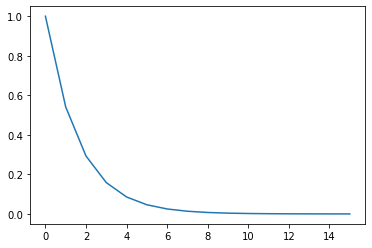

<Figure size 432x288 with 0 Axes>

In [15]:
#y = np.logspace(0, 10, num=16)
y = np.logspace(0, -4, num=16)

x = np.arange(y.shape[0])

print(y.shape)
print(len(y))
print(y)
print(x.shape)
print(x)

plt.plot(x,y)
plt.figure()
plt.show()


## テキストのサンプルプログラムを動作させてみる

============== 1/16 ==============
epoch:0 | 0.117 - 0.107


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.127
epoch:2 | 0.097 - 0.144
epoch:3 | 0.097 - 0.173
epoch:4 | 0.097 - 0.187
epoch:5 | 0.097 - 0.207
epoch:6 | 0.097 - 0.233
epoch:7 | 0.097 - 0.26
epoch:8 | 0.097 - 0.276
epoch:9 | 0.097 - 0.292
epoch:10 | 0.097 - 0.314
epoch:11 | 0.097 - 0.32
epoch:12 | 0.097 - 0.348
epoch:13 | 0.097 - 0.36
epoch:14 | 0.097 - 0.378
epoch:15 | 0.097 - 0.385
epoch:16 | 0.097 - 0.396
epoch:17 | 0.097 - 0.402
epoch:18 | 0.097 - 0.434


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.438
============== 2/16 ==============
epoch:0 | 0.099 - 0.138
epoch:1 | 0.097 - 0.104
epoch:2 | 0.097 - 0.123
epoch:3 | 0.097 - 0.161
epoch:4 | 0.097 - 0.184
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.219
epoch:7 | 0.097 - 0.237
epoch:8 | 0.097 - 0.258
epoch:9 | 0.097 - 0.276
epoch:10 | 0.097 - 0.305
epoch:11 | 0.097 - 0.322
epoch:12 | 0.097 - 0.335
epoch:13 | 0.097 - 0.354
epoch:14 | 0.097 - 0.379
epoch:15 | 0.097 - 0.405
epoch:16 | 0.097 - 0.427
epoch:17 | 0.097 - 0.438
epoch:18 | 0.097 - 0.457


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.47
============== 3/16 ==============
epoch:0 | 0.147 - 0.12
epoch:1 | 0.334 - 0.12
epoch:2 | 0.48 - 0.166
epoch:3 | 0.581 - 0.213
epoch:4 | 0.61 - 0.245
epoch:5 | 0.683 - 0.281
epoch:6 | 0.735 - 0.313
epoch:7 | 0.762 - 0.35
epoch:8 | 0.792 - 0.368
epoch:9 | 0.828 - 0.403
epoch:10 | 0.846 - 0.426
epoch:11 | 0.867 - 0.453
epoch:12 | 0.878 - 0.482
epoch:13 | 0.896 - 0.514
epoch:14 | 0.918 - 0.543
epoch:15 | 0.921 - 0.557
epoch:16 | 0.936 - 0.577
epoch:17 | 0.947 - 0.594
epoch:18 | 0.95 - 0.614


No handles with labels found to put in legend.


epoch:19 | 0.959 - 0.635
============== 4/16 ==============
epoch:0 | 0.117 - 0.102
epoch:1 | 0.312 - 0.098
epoch:2 | 0.442 - 0.169
epoch:3 | 0.548 - 0.225
epoch:4 | 0.622 - 0.292
epoch:5 | 0.673 - 0.355
epoch:6 | 0.696 - 0.417
epoch:7 | 0.743 - 0.474
epoch:8 | 0.768 - 0.51
epoch:9 | 0.786 - 0.546
epoch:10 | 0.806 - 0.578
epoch:11 | 0.808 - 0.616
epoch:12 | 0.824 - 0.641
epoch:13 | 0.837 - 0.678
epoch:14 | 0.844 - 0.699
epoch:15 | 0.86 - 0.712
epoch:16 | 0.86 - 0.74
epoch:17 | 0.874 - 0.743
epoch:18 | 0.879 - 0.757


No handles with labels found to put in legend.


epoch:19 | 0.89 - 0.764
============== 5/16 ==============
epoch:0 | 0.096 - 0.098
epoch:1 | 0.097 - 0.14
epoch:2 | 0.097 - 0.304
epoch:3 | 0.101 - 0.418
epoch:4 | 0.109 - 0.502
epoch:5 | 0.116 - 0.577
epoch:6 | 0.125 - 0.629
epoch:7 | 0.152 - 0.674
epoch:8 | 0.156 - 0.708
epoch:9 | 0.164 - 0.73
epoch:10 | 0.175 - 0.744
epoch:11 | 0.178 - 0.77
epoch:12 | 0.181 - 0.79
epoch:13 | 0.184 - 0.809
epoch:14 | 0.191 - 0.828
epoch:15 | 0.199 - 0.841
epoch:16 | 0.201 - 0.857
epoch:17 | 0.213 - 0.864
epoch:18 | 0.225 - 0.871


No handles with labels found to put in legend.


epoch:19 | 0.223 - 0.873
============== 6/16 ==============
epoch:0 | 0.118 - 0.093
epoch:1 | 0.098 - 0.22
epoch:2 | 0.117 - 0.474
epoch:3 | 0.117 - 0.654
epoch:4 | 0.112 - 0.717
epoch:5 | 0.115 - 0.761
epoch:6 | 0.115 - 0.797
epoch:7 | 0.137 - 0.815
epoch:8 | 0.12 - 0.839
epoch:9 | 0.119 - 0.85
epoch:10 | 0.129 - 0.867
epoch:11 | 0.121 - 0.878
epoch:12 | 0.117 - 0.888
epoch:13 | 0.12 - 0.894
epoch:14 | 0.117 - 0.907
epoch:15 | 0.116 - 0.91
epoch:16 | 0.116 - 0.927
epoch:17 | 0.116 - 0.938
epoch:18 | 0.116 - 0.943


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.951
============== 7/16 ==============
epoch:0 | 0.097 - 0.139
epoch:1 | 0.117 - 0.302
epoch:2 | 0.117 - 0.563
epoch:3 | 0.117 - 0.698
epoch:4 | 0.117 - 0.743
epoch:5 | 0.117 - 0.768
epoch:6 | 0.117 - 0.798
epoch:7 | 0.117 - 0.84
epoch:8 | 0.117 - 0.87
epoch:9 | 0.117 - 0.896
epoch:10 | 0.117 - 0.914
epoch:11 | 0.117 - 0.942
epoch:12 | 0.117 - 0.956
epoch:13 | 0.117 - 0.965
epoch:14 | 0.117 - 0.972
epoch:15 | 0.117 - 0.976
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.984
epoch:18 | 0.117 - 0.984


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.988
============== 8/16 ==============
epoch:0 | 0.118 - 0.112
epoch:1 | 0.116 - 0.355
epoch:2 | 0.116 - 0.704
epoch:3 | 0.116 - 0.777
epoch:4 | 0.116 - 0.83
epoch:5 | 0.116 - 0.884
epoch:6 | 0.116 - 0.928
epoch:7 | 0.116 - 0.944
epoch:8 | 0.116 - 0.965
epoch:9 | 0.116 - 0.972
epoch:10 | 0.116 - 0.981
epoch:11 | 0.116 - 0.986
epoch:12 | 0.116 - 0.992
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.998
============== 9/16 ==============
epoch:0 | 0.097 - 0.161
epoch:1 | 0.117 - 0.532
epoch:2 | 0.116 - 0.69
epoch:3 | 0.116 - 0.753
epoch:4 | 0.116 - 0.808
epoch:5 | 0.116 - 0.854
epoch:6 | 0.117 - 0.882
epoch:7 | 0.116 - 0.909
epoch:8 | 0.116 - 0.954
epoch:9 | 0.117 - 0.975
epoch:10 | 0.116 - 0.989
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.1 - 0.104
epoch:1 | 0.117 - 0.502
epoch:2 | 0.105 - 0.687
epoch:3 | 0.117 - 0.85
epoch:4 | 0.117 - 0.911
epoch:5 | 0.116 - 0.936
epoch:6 | 0.116 - 0.963
epoch:7 | 0.117 - 0.978
epoch:8 | 0.117 - 0.984
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.984
epoch:11 | 0.117 - 0.988
epoch:12 | 0.117 - 0.994
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.998
============== 11/16 ==============
epoch:0 | 0.117 - 0.134
epoch:1 | 0.117 - 0.435
epoch:2 | 0.117 - 0.597
epoch:3 | 0.116 - 0.659
epoch:4 | 0.117 - 0.684
epoch:5 | 0.116 - 0.695
epoch:6 | 0.116 - 0.687
epoch:7 | 0.116 - 0.787
epoch:8 | 0.117 - 0.751
epoch:9 | 0.117 - 0.791
epoch:10 | 0.117 - 0.792
epoch:11 | 0.117 - 0.792
epoch:12 | 0.117 - 0.815
epoch:13 | 0.117 - 0.869
epoch:14 | 0.117 - 0.887
epoch:15 | 0.117 - 0.878
epoch:16 | 0.117 - 0.882
epoch:17 | 0.117 - 0.893
epoch:18 | 0.117 - 0.895


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.883
============== 12/16 ==============
epoch:0 | 0.116 - 0.253
epoch:1 | 0.116 - 0.6
epoch:2 | 0.116 - 0.612
epoch:3 | 0.116 - 0.666
epoch:4 | 0.116 - 0.707
epoch:5 | 0.116 - 0.757
epoch:6 | 0.116 - 0.765
epoch:7 | 0.116 - 0.768
epoch:8 | 0.116 - 0.775
epoch:9 | 0.116 - 0.783
epoch:10 | 0.116 - 0.793
epoch:11 | 0.116 - 0.762
epoch:12 | 0.116 - 0.646
epoch:13 | 0.116 - 0.775
epoch:14 | 0.116 - 0.756
epoch:15 | 0.116 - 0.768
epoch:16 | 0.116 - 0.806
epoch:17 | 0.116 - 0.811
epoch:18 | 0.116 - 0.812


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.812
============== 13/16 ==============
epoch:0 | 0.105 - 0.105
epoch:1 | 0.105 - 0.491
epoch:2 | 0.116 - 0.586
epoch:3 | 0.116 - 0.597
epoch:4 | 0.117 - 0.66
epoch:5 | 0.117 - 0.628
epoch:6 | 0.117 - 0.647
epoch:7 | 0.117 - 0.702
epoch:8 | 0.116 - 0.696
epoch:9 | 0.116 - 0.699
epoch:10 | 0.117 - 0.69
epoch:11 | 0.117 - 0.703
epoch:12 | 0.117 - 0.694
epoch:13 | 0.116 - 0.703
epoch:14 | 0.116 - 0.718
epoch:15 | 0.117 - 0.74
epoch:16 | 0.117 - 0.739
epoch:17 | 0.117 - 0.744
epoch:18 | 0.117 - 0.736


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.73
============== 14/16 ==============
epoch:0 | 0.105 - 0.114
epoch:1 | 0.116 - 0.41
epoch:2 | 0.116 - 0.513
epoch:3 | 0.117 - 0.534
epoch:4 | 0.117 - 0.6
epoch:5 | 0.116 - 0.599
epoch:6 | 0.116 - 0.449
epoch:7 | 0.117 - 0.607
epoch:8 | 0.117 - 0.612
epoch:9 | 0.117 - 0.606
epoch:10 | 0.117 - 0.613
epoch:11 | 0.116 - 0.614
epoch:12 | 0.116 - 0.615
epoch:13 | 0.116 - 0.616
epoch:14 | 0.116 - 0.616
epoch:15 | 0.116 - 0.618
epoch:16 | 0.116 - 0.617
epoch:17 | 0.116 - 0.615
epoch:18 | 0.116 - 0.617


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.622
============== 15/16 ==============
epoch:0 | 0.105 - 0.131
epoch:1 | 0.105 - 0.312
epoch:2 | 0.105 - 0.343
epoch:3 | 0.117 - 0.399
epoch:4 | 0.117 - 0.368
epoch:5 | 0.117 - 0.229
epoch:6 | 0.117 - 0.394
epoch:7 | 0.117 - 0.419
epoch:8 | 0.117 - 0.419
epoch:9 | 0.116 - 0.418
epoch:10 | 0.116 - 0.421
epoch:11 | 0.116 - 0.431
epoch:12 | 0.116 - 0.42
epoch:13 | 0.116 - 0.426
epoch:14 | 0.116 - 0.432
epoch:15 | 0.116 - 0.433
epoch:16 | 0.116 - 0.432
epoch:17 | 0.116 - 0.443
epoch:18 | 0.116 - 0.512


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.523
============== 16/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.116 - 0.297
epoch:2 | 0.117 - 0.317
epoch:3 | 0.117 - 0.399
epoch:4 | 0.117 - 0.406
epoch:5 | 0.117 - 0.415
epoch:6 | 0.117 - 0.418
epoch:7 | 0.117 - 0.414
epoch:8 | 0.117 - 0.417
epoch:9 | 0.117 - 0.41
epoch:10 | 0.117 - 0.418
epoch:11 | 0.117 - 0.41
epoch:12 | 0.117 - 0.461
epoch:13 | 0.117 - 0.422
epoch:14 | 0.117 - 0.42
epoch:15 | 0.117 - 0.42
epoch:16 | 0.117 - 0.445
epoch:17 | 0.117 - 0.475
epoch:18 | 0.117 - 0.437
epoch:19 | 0.117 - 0.437


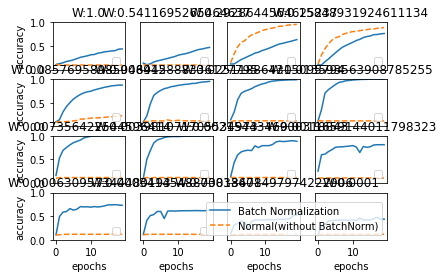

In [20]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

#logspaceを使って適当に重みのスケールを生成して(16個の数字)、それぞれBatchNormalizationを使った学習を行い、
#結果を合計16枚のグラフとして描画する。
for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w) #BatchNormalizationを使ったニューラルネットワーク
    
    #4 * 4に描画領域を分割して、描画対象の領域を指定する
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        #16枚目（最後）のグラフにlabelをつける
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:     
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)
        #以下のようなコードを書くと、書くグラフにlabelが乗り、非常に見難くなる
#        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
#        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)

    #xticks/yticksの使い方
    #https://tech-market.org/matplotlib-memori-mozi/
    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([]) # 目盛りを消すのに[]を渡す。
    else:
        plt.ylabel("accuracy") #グラフ4つごとにラベルを設定
    if i < 12:
        plt.xticks([])# 目盛りを消すのに[]を渡す。
    else:
        plt.xlabel("epochs") #一番下の段のグラフにラベルを設定
    plt.legend(loc='lower right')
